# Experiment no: 4 Bagging and Boosting
## Sarvesh Vikas Tikekar (2022120037)

### Boosting Technique using Xtreme Gradient Boosting (XGBoost)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
"""Dataset link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset """

data = pd.read_csv('/content/drive/MyDrive/CSL701-Machine-Learning/Datasets/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [107]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [108]:
dtype = data.dtypes
dtype = dtype[dtype == 'object']
dtype

,0
gender,object
ever_married,object
work_type,object
Residence_type,object
smoking_status,object


In [109]:
!pip install xgboost
!pip install scikit-learn

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [111]:
"""Converting all categoricals nominal variables into numerical values using label encoder"""

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [112]:
"""Filling missing values for BMI (Body Mass Index) using mode of dataset """

BMI_mode = data['bmi'].mode()[0]
data1 = data.fillna({'bmi': BMI_mode})
data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.7,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.7,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


AUC ROC Score is 0.7791666666666667
Accuracy is 93.34637964774952


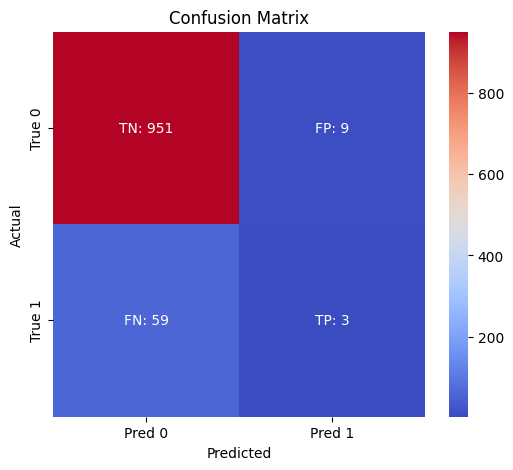

In [113]:
"""Splitting the training and testing data for the XGBOOST Classifier """
X = data1.drop(columns=['stroke'], axis=1)
y = data1['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

XGBmodel = XGBClassifier(
    booster='gbtree',
    n_estimators=1000,
    max_depth=10,
    eval_metric='auc',
    objective='binary:logistic'
)

XGBmodel.fit(X_train, y_train)

y_pred = XGBmodel.predict(X_test)
y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]

score = roc_auc_score(y_test, y_pred_proba)
acc_score = accuracy_score(y_test, y_pred)

print(f"AUC ROC Score is {score}")
print(f"Accuracy is {acc_score * 100}")

conf = confusion_matrix(y_test, y_pred)
labels = np.asarray([['TN', 'FP'], ['FN', 'TP']])

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        annot[i,j] = f"{labels[i,j]}: {conf[i,j]}"

plt.figure(figsize=(6,5))

sns.heatmap(conf, annot=annot, cmap='coolwarm', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'], fmt='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [114]:
"""Now with thresholds"""

threshold = 0
incremental_rate = 0.0001

FPR_LIST = []
TPR_LIST = []

linearLineX = np.linspace(0, 1, 10000)
linearLineY = np.linspace(0, 1, 10000)

y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]

while threshold <= 1:

  y_pred = (y_pred_proba >= threshold).astype(int)

  tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

  TPR_LIST.append(tp/(tp + fn))
  FPR_LIST.append(fp/(fp + tn))

  threshold += incremental_rate

<Axes: >

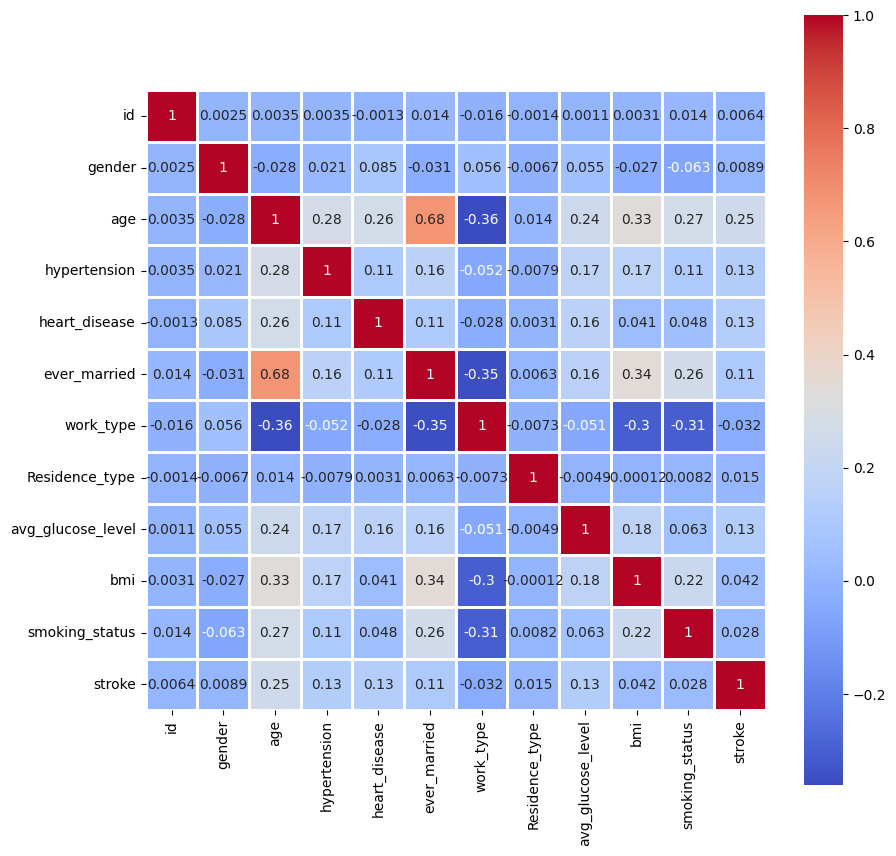

In [115]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, linewidths=2)

In [116]:
""" Filling missing values for BMI (Body Mass Index) with mean of dataset """

BMI_mean = round(data['bmi'].mean(), 2)
data2 = data.fillna({'bmi': BMI_mean})
data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.60,1,0


In [117]:
"""Splitting the training and testing data for the XGBOOST Classifier """
X = data2.drop(columns=['stroke'], axis=1)
y = data2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

XGBmodel = XGBClassifier(
    booster='gbtree',
    n_estimators=1000,
    max_depth=10,
    eval_metric='auc',
    objective='binary:logistic'
)

XGBmodel.fit(X_train, y_train)

y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]
y_pred = XGBmodel.predict(X_test)

score2 = roc_auc_score(y_test, y_pred_proba)
acc_score = accuracy_score(y_test, y_pred)

print(f"AUC ROC Score is {score2}")
print(f"Accuracy is {acc_score * 100}")

AUC ROC Score is 0.7817204301075269
Accuracy is 93.44422700587084


In [118]:
"""Now with thresholds"""

threshold = 0
incremental_rate = 0.0001

FPR_LIST2 = []
TPR_LIST2 = []

y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]

while threshold <= 1:

  y_pred = (y_pred_proba >= threshold).astype(int)

  tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

  TPR_LIST2.append(tp/(tp + fn))
  FPR_LIST2.append(fp/(fp + tn))

  threshold += incremental_rate


In [119]:
""" Depending on correlation we group the bmi and age columns """
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = [i for i in range(1, 10)]
data3 = data

"""Filling missing values by mean of each age group depending on the bins for more enriched and accurate results """

data3['age'] = pd.cut(data3['age'], bins=bins, labels=labels).astype(int)
data3['bmi'] = data.groupby(data3['age'])['bmi'].transform(lambda x: round(x.fillna(x.mean()), 2))

In [120]:
"""Splitting the training and testing data for the XGBOOST Classifier """
X = data3.drop(columns=['stroke'], axis=1)
y = data3['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

XGBmodel = XGBClassifier(
    booster='gbtree',
    n_estimators=1000,
    max_depth=10,
    eval_metric='auc',
    objective='binary:logistic'
)

XGBmodel.fit(X_train, y_train)

y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]
y_pred = XGBmodel.predict(X_test)

score3 = roc_auc_score(y_test, y_pred_proba)
acc_score = accuracy_score(y_test, y_pred)

print(f"AUC ROC Score is {score3}")
print(f"Accuracy is {acc_score * 100}")

AUC ROC Score is 0.7625840053763441
Accuracy is 93.15068493150685


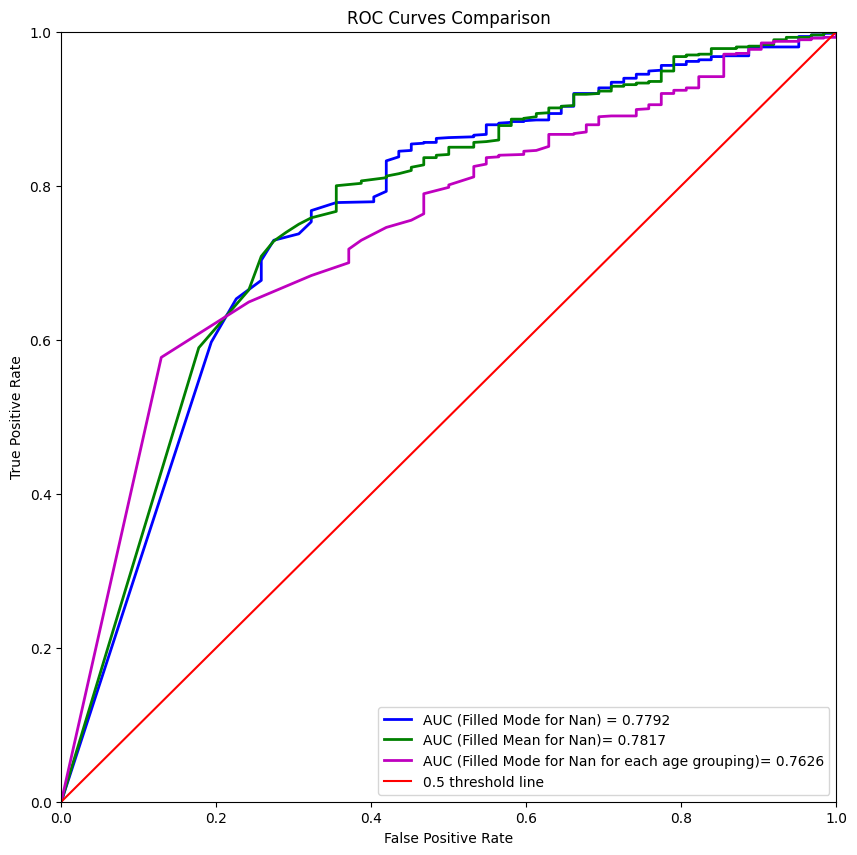

In [121]:
"""Now with thresholds"""

threshold = 0
incremental_rate = 0.0001

FPR_LIST3 = []
TPR_LIST3 = []

y_pred_proba = XGBmodel.predict_proba(X_test)[:, 1]

while threshold <= 1:

  y_pred = (y_pred_proba >= threshold).astype(int)

  tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

  TPR_LIST3.append(tp/(tp + fn))
  FPR_LIST3.append(fp/(fp + tn))

  threshold += incremental_rate

plt.figure(figsize=(10, 10))

plt.plot(FPR_LIST, TPR_LIST, label=f"AUC (Filled Mode for Nan) = {score:.4f}", linewidth=2, color='b')
plt.plot(FPR_LIST2, TPR_LIST2, label=f"AUC (Filled Mean for Nan)= {score2:.4f}", linewidth=2, color='g')
plt.plot(FPR_LIST3, TPR_LIST3, label=f"AUC (Filled Mode for Nan for each age grouping)= {score3:.4f}", linewidth=2, color='m')

plt.plot(linearLineX, linearLineY, label=f"0.5 threshold line", color='red')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.show()

# Bagging (Ensemble Learning) on the dataset

Accuracy score score is: 0.9373776908023483
AUC ROC score is: 0.794203629032258


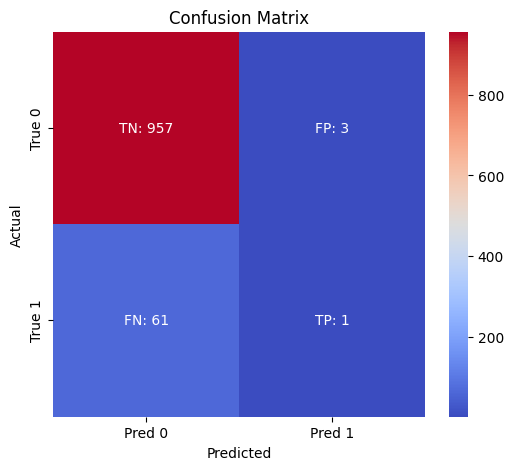

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_data = data

"""Splitting the training and testing data for the XGBOOST Classifier """

X = bagging_data.drop(columns=['stroke'], axis=1)
y = bagging_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

dc = DecisionTreeClassifier()

# Using 100 parallel models as estimators

bagging_classifier_model = BaggingClassifier(dc, n_estimators=100)
bagging_classifier_model.fit(X_train, y_train)

y_pred_probable = bagging_classifier_model.predict_proba(X_test)[:, 1]
y_pred = bagging_classifier_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_probable)

conf = confusion_matrix(y_test, y_pred)

print(f"Accuracy score score is: {acc_score}")
print(f"AUC ROC score is: {auc_score}")

conf = confusion_matrix(y_test, y_pred)
labels = np.asarray([['TN', 'FP'], ['FN', 'TP']])

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        annot[i,j] = f"{labels[i,j]}: {conf[i,j]}"

plt.figure(figsize=(6,5))

sns.heatmap(conf, annot=annot, cmap='coolwarm', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'], fmt='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy score score is: 0.9363992172211351
AUC ROC score is: 0.7653477822580645


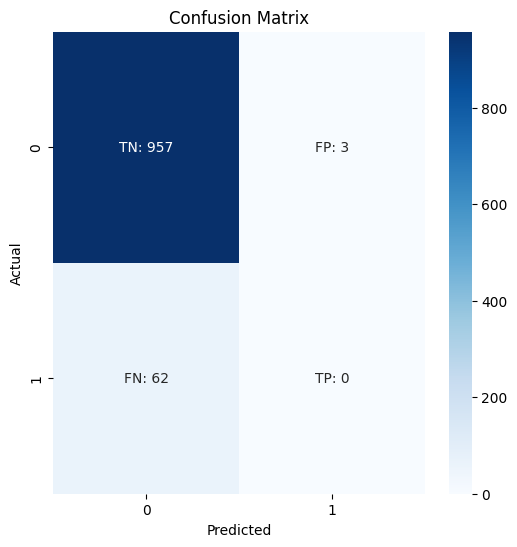

In [123]:
"""For missing values filled with mean for each age group (Slight Increase in Accuracy) and AUC ROC Score """

bagging_data = data3

"""Splitting the training and testing data for the XGBOOST Classifier """
X = bagging_data.drop(columns=['stroke'], axis=1)
y = bagging_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

dc = DecisionTreeClassifier()

# Using 100 parallel models as estimators

bagging_classifier_model = BaggingClassifier(dc, n_estimators=100)
bagging_classifier_model.fit(X_train, y_train)

y_pred_probable = bagging_classifier_model.predict_proba(X_test)[:, 1]
y_pred = bagging_classifier_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_probable)

conf = confusion_matrix(y_test, y_pred)

print(f"Accuracy score score is: {acc_score}")
print(f"AUC ROC score is: {auc_score}")

labels = np.array([['TN', 'FP'],
                   ['FN', 'TP']])

counts = conf.astype(int)
labels_counts = np.asarray([f"{label}: {count}" for label, count in zip(labels.flatten(), counts.flatten())])
labels_counts = labels_counts.reshape(2,2)

plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=labels_counts, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison of Both Algorithms Using AUC-ROC Curve Graphs and Accuracy

In [124]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,7,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,7,0,0,1,3,0,202.21,30.96,2,1
2,31112,1,8,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,5,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,8,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,8,1,0,1,2,1,83.75,29.14,2,0
5106,44873,0,9,0,0,1,3,1,125.20,40.00,2,0
5107,19723,0,4,0,0,1,3,0,82.99,30.60,2,0
5108,37544,1,6,0,0,1,2,0,166.29,25.60,1,0


Average Accuracy of XGBoost is: 91.86497064579258
Average Accuracy of Bagging Classifier is: 89.33268101761253


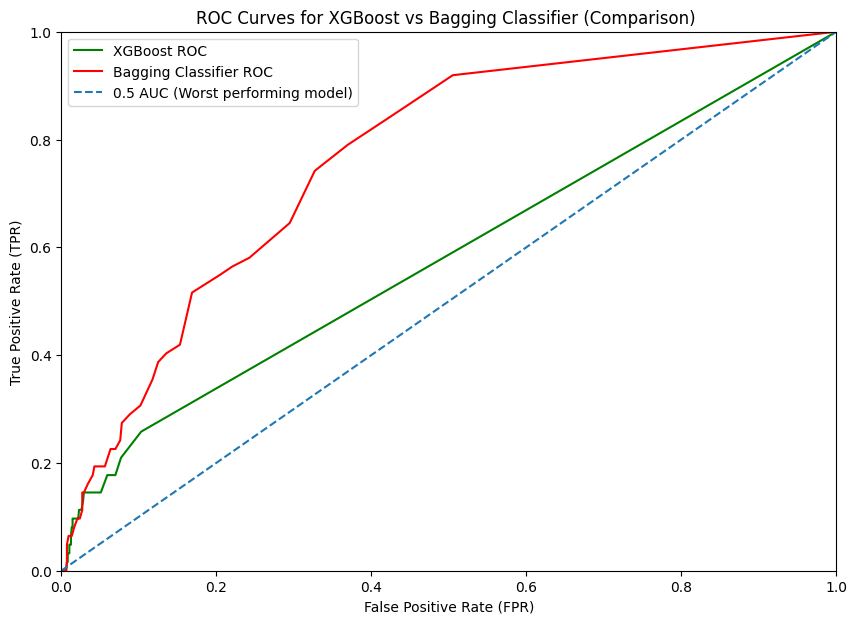

In [127]:
X = data.drop(columns=['stroke'])
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

XGBmodel.fit(X_train, y_train)
bagging_classifier_model.fit(X_train, y_train)

y_pred_proba_xgb = XGBmodel.predict_proba(X_test)[:, 1]
y_pred_proba_bcm = bagging_classifier_model.predict_proba(X_test)[:, 1]

# To store results
thresh = []
tpr_xgb, fpr_xgb = [], []
tpr_bcm, fpr_bcm = [], []
acc_Xgb = np.asarray([])
acc_Bcm = np.asarray([])

threshold = 0
incremental_rate = 0.01   # coarser step, adjust as needed

while threshold <= 1:
    # Predictions at this threshold
    y_pred_xgb = (y_pred_proba_xgb >= threshold).astype(int)
    y_pred_bcm = (y_pred_proba_bcm >= threshold).astype(int)

    acc_Xgb = np.append(acc_Xgb, accuracy_score(y_test, y_pred_xgb))
    acc_Bcm = np.append(acc_Bcm, accuracy_score(y_test, y_pred_bcm))

    # Confusion matrices
    tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()
    tn_bcm, fp_bcm, fn_bcm, tp_bcm = confusion_matrix(y_test, y_pred_bcm).ravel()

    # TPR = TP / (TP + FN), FPR = FP / (FP + TN)
    tpr_xgb.append(tp_xgb / (tp_xgb + fn_xgb) if (tp_xgb + fn_xgb) > 0 else 0)
    fpr_xgb.append(fp_xgb / (fp_xgb + tn_xgb) if (fp_xgb + tn_xgb) > 0 else 0)

    tpr_bcm.append(tp_bcm / (tp_bcm + fn_bcm) if (tp_bcm + fn_bcm) > 0 else 0)
    fpr_bcm.append(fp_bcm / (fp_bcm + tn_bcm) if (fp_bcm + tn_bcm) > 0 else 0)

    thresh.append(threshold)
    threshold += incremental_rate

print(f"Average Accuracy of XGBoost is: {np.mean(acc_Xgb) * 100}")
print(f"Average Accuracy of Bagging Classifier is: {np.mean(acc_Bcm) * 100}")

# Plot ROC curves for both
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color="green", label="XGBoost ROC")
plt.plot(fpr_bcm, tpr_bcm, color="red", label="Bagging Classifier ROC")
plt.plot(linearLineX, linearLineY, '--', label="0.5 AUC (Worst performing model)")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC Curves for XGBoost vs Bagging Classifier (Comparison) ")
plt.legend()
plt.show()